In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
# Function to generate hexagonal grid points
def generate_hex_grid(rows, distance):
    points = []
    for row in range(rows):
        num_points = 7 if row % 2 == 0 else 6
        for col in range(num_points):
            x = col * distance * np.sqrt(3) / 2
            y = row * distance * np.sqrt(3) / 2
            if row % 2 == 1:
                x += distance * np.sqrt(3) / 4
            x=x+8
            y=y+8
            points.append((x, y))
    return points

In [3]:
# Generate hexagonal grid points
rows = 7
distance = 16  # cm
points = generate_hex_grid(rows, distance)

# Add z coordinates to the points
z_coords = np.linspace(5, 105, 10)
points = [(x, y, z) for (x, y) in points for z in z_coords]


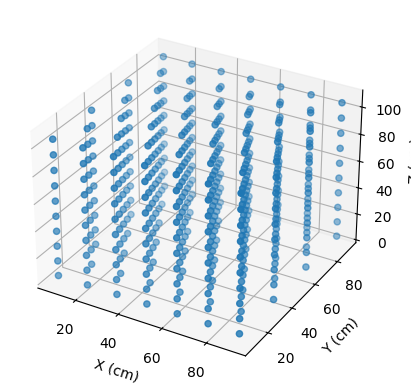

In [4]:
# Plot the hexagonal grid points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(*points)
ax.scatter(x_coords, y_coords, z_coords)
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
plt.show()


In [41]:
points_dict = {}
for (x, y, z) in points:
    y_value = round(y, 0)
    if y_value not in points_dict:
        points_dict[y_value] = {}
    point_id = len(points_dict[y_value])
    points_dict[y_value][point_id] = [x, y, z]


In [67]:
pin_dict={8.0:2,22.0:3,36.0:4,50.0:5,63.0:6,77.0:7,91.0:8}

In [68]:
new_dict={}
for y_value in points_dict:
    ids = list(points_dict[y_value].keys())
    cols = int(len(ids)/10)
    ledid=99
    top=False
    if(cols==7): top=True
    for i in range(cols):
        for j in range(10):
            oldid=10*i+j
            x, y, z = points_dict[y_value][oldid]
            newid=-999
            if(top):
                newid=ledid-9+j
            else:
                newid=ledid-j
            new_dict[pin_dict[y_value],newid] = [x, y, z]
        top = not top
        ledid=ledid-13


In [70]:

with open('data.csv', 'w', newline='') as file:
 writer = csv.writer(file)
    for key, value in data.items():
        writer.writerow([key[0], key[1], *value])


In [72]:
new_dict.items()

dict_items([((2, 90), [8.0, 8.0, 5.0]), ((2, 91), [8.0, 8.0, 16.11111111111111]), ((2, 92), [8.0, 8.0, 27.22222222222222]), ((2, 93), [8.0, 8.0, 38.33333333333333]), ((2, 94), [8.0, 8.0, 49.44444444444444]), ((2, 95), [8.0, 8.0, 60.55555555555556]), ((2, 96), [8.0, 8.0, 71.66666666666666]), ((2, 97), [8.0, 8.0, 82.77777777777777]), ((2, 98), [8.0, 8.0, 93.88888888888889]), ((2, 99), [8.0, 8.0, 105.0]), ((2, 86), [21.856406460551018, 8.0, 5.0]), ((2, 85), [21.856406460551018, 8.0, 16.11111111111111]), ((2, 84), [21.856406460551018, 8.0, 27.22222222222222]), ((2, 83), [21.856406460551018, 8.0, 38.33333333333333]), ((2, 82), [21.856406460551018, 8.0, 49.44444444444444]), ((2, 81), [21.856406460551018, 8.0, 60.55555555555556]), ((2, 80), [21.856406460551018, 8.0, 71.66666666666666]), ((2, 79), [21.856406460551018, 8.0, 82.77777777777777]), ((2, 78), [21.856406460551018, 8.0, 93.88888888888889]), ((2, 77), [21.856406460551018, 8.0, 105.0]), ((2, 64), [35.712812921102035, 8.0, 5.0]), ((2, 65